#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [ ]:
# Write your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Assignment 2 dataset.csv')
print(df.shape)
df.head(10)


Saving Assignment 2 dataset.csv to Assignment 2 dataset (2).csv
(18254, 14)


,Column 1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12-27-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12-20-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12-13-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12-6-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11-29-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,11-22-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,11-15-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,11-8-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,11-1-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,10-25-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

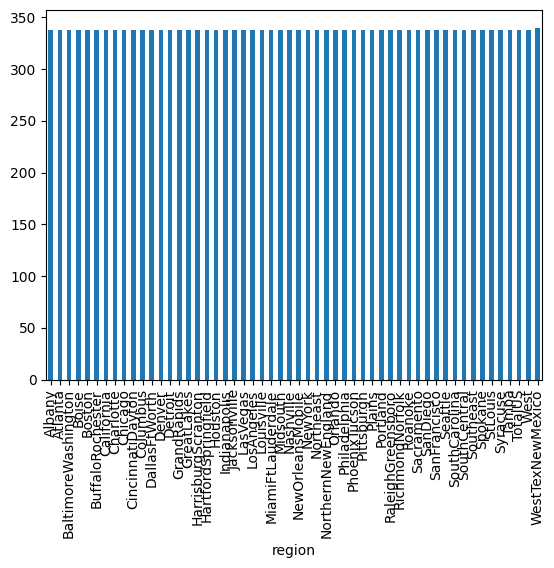

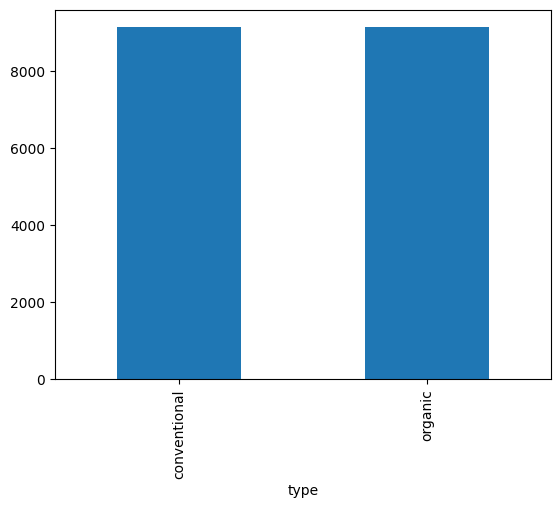

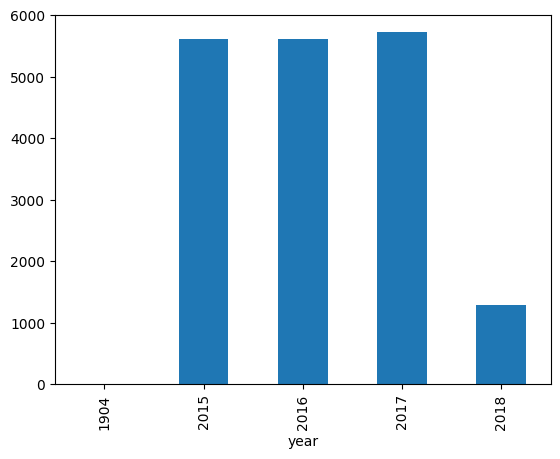

In [ ]:
# Write your code here

df['region'].value_counts().sort_index().plot(kind='bar')
plt.show()
df['type'].value_counts().sort_index().plot(kind='bar')
plt.show()
df['year'].value_counts().sort_index().plot(kind='bar')
plt.show()

# From the graphs it is clear that region and type are well represented, however
# the year column has bias: 2015, 2016, 2017 are well represented while 2018 has
# only 1/5 of those other years entries. 1904 is also there and looks to be an error.

1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

In [ ]:
# Write your code here
num_of_duplicates = df.duplicated().sum()
num_of_null_rows = df.isnull().sum()
print(f"number of duplicate rows: {num_of_duplicates}")
print(f"Nulls per column:")
print(num_of_null_rows)

# Since there are only 2 rows with null values, and the data has a many rows of
# real information, I don't think it is necessary to impute or replace the missing values.
# I will just drop the rows containing null values and the duplicate rows.

number of duplicate rows: 2
Nulls per column:
Column 1        0
Date            0
AveragePrice    0
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
year            0
region          0
dtype: int64


1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [ ]:
# Write your code here

df.shape

# I think this is sufficient for training a data model because the rule is to have
# atleast 10 times more data points than the number of features.

(18254, 14)

#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [ ]:
# Write your code here

df1 = df.drop(columns='Column 1')
df1['year'] = df1['year'].astype('str')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18254 entries, 0 to 18253
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18254 non-null  object 
 1   AveragePrice  18254 non-null  float64
 2   Total Volume  18253 non-null  float64
 3   4046          18252 non-null  float64
 4   4225          18253 non-null  float64
 5   4770          18253 non-null  float64
 6   Total Bags    18253 non-null  float64
 7   Small Bags    18252 non-null  float64
 8   Large Bags    18252 non-null  float64
 9   XLarge Bags   18253 non-null  float64
 10  type          18253 non-null  object 
 11  year          18254 non-null  object 
 12  region        18254 non-null  object 
dtypes: float64(9), object(4)
memory usage: 1.8+ MB


2.2 Check for duplicate values and remove them.

In [ ]:
# Write your code here
df2 = df1.drop_duplicates()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18252 entries, 0 to 18252
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18252 non-null  object 
 1   AveragePrice  18252 non-null  float64
 2   Total Volume  18251 non-null  float64
 3   4046          18250 non-null  float64
 4   4225          18251 non-null  float64
 5   4770          18251 non-null  float64
 6   Total Bags    18251 non-null  float64
 7   Small Bags    18250 non-null  float64
 8   Large Bags    18250 non-null  float64
 9   XLarge Bags   18251 non-null  float64
 10  type          18251 non-null  object 
 11  year          18252 non-null  object 
 12  region        18252 non-null  object 
dtypes: float64(9), object(4)
memory usage: 1.9+ MB


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [ ]:
df2.groupby('region').median(numeric_only=True)
df2[df2['region'] == 'WestTexNewMexico'].median(numeric_only=True)


,0
AveragePrice,1.145
Total Volume,296402.960
4046,138208.475
4225,39757.860
4770,1914.090
Total Bags,66835.640
Small Bags,58120.550
Large Bags,3577.840
XLarge Bags,0.000


In [ ]:
# Write your code here
df2['4046'] = df2['4046'].fillna(df2[df2['region'] == 'WestTexNewMexico'].median(numeric_only=True)['4046'])
df2['Small Bags'] = df2['Small Bags'].fillna(df2[df2['region'] == 'WestTexNewMexico'].median(numeric_only=True)['Small Bags'])
df2['Large Bags'] = df2['Large Bags'].fillna(df2[df2['region'] == 'WestTexNewMexico'].median(numeric_only=True)['Large Bags'])

/tmp/ipython-input-2972369441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['4046'] = df2['4046'].fillna(df2[df2['region'] == 'WestTexNewMexico'].median(numeric_only=True)['4046'])
/tmp/ipython-input-2972369441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Small Bags'] = df2['Small Bags'].fillna(df2[df2['region'] == 'WestTexNewMexico'].median(numeric_only=True)['Small Bags'])
/tmp/ipython-input-2972369441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [ ]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18251 entries, 0 to 18251
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18251 non-null  object 
 1   AveragePrice  18251 non-null  float64
 2   Total Volume  18251 non-null  float64
 3   4046          18251 non-null  float64
 4   4225          18251 non-null  float64
 5   4770          18251 non-null  float64
 6   Total Bags    18251 non-null  float64
 7   Small Bags    18251 non-null  float64
 8   Large Bags    18251 non-null  float64
 9   XLarge Bags   18251 non-null  float64
 10  type          18251 non-null  object 
 11  year          18251 non-null  object 
 12  region        18251 non-null  object 
dtypes: float64(9), object(4)
memory usage: 1.9+ MB


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


<Axes: >

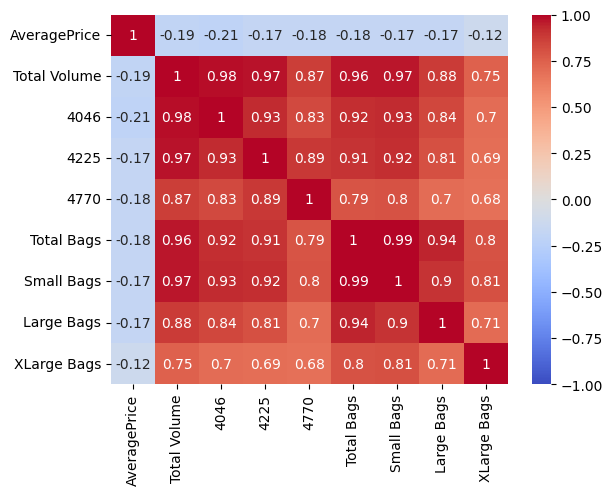

In [ ]:
# Write your code here
df2_corr = df2.corr(numeric_only=True)
sns.heatmap(df2_corr, cmap = 'coolwarm', vmin = -1, annot=True)

# None of the variable have a strong correlation with the average price,
# however all other variables have a medium to strong correlation with eachother.
# Since AveragePrice is the most likely to be predicted value, the model accuracy will not be very high.

#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

In [130]:
# Write your code here

# Date - date of sale
# Averageprice - average price per avocado
# Total Volume - total number of avocados sold (skewed)
# 4046 - small avacados sold (skewed)
# 4225 - Large avacados sold (skewed)
# 4770 - XLarge avacados sold (skewed)
# Total Bags - Total bags of avacados sold (skewed)
# Small Bags - Small avacado bags sold (skewed)
# Large Bags - Large avacado bags sold (skewed)
# XLarge Bags - XLarge avacado bags sold (skewed)
# type - avacado type - organic or conventional
# year - year of sale
# region - different regions that were used for data collection
print(df2.describe())
print()

type_unique = df2['type'].unique().tolist()
year_unique = df2['year'].unique().tolist()
region_unique = df2['region'].unique().tolist()

print(f"Unique types: {type_unique}")
print(f"Unique years: {year_unique}")
print(f"Unique regions: {region_unique}")

       AveragePrice  Total Volume          4046          4225          4770  \
count  18251.000000  1.825100e+04  1.825100e+04  1.825100e+04  1.825100e+04   
mean       1.406020  8.505523e+05  2.929840e+05  2.951225e+05  2.283727e+04   
std        0.402675  3.453367e+06  1.264922e+06  1.204058e+06  1.074584e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.084067e+04  8.543500e+02  3.008325e+03  0.000000e+00   
50%        1.370000  1.073542e+05  8.645300e+03  2.905673e+04  1.849900e+02   
75%        1.660000  4.329430e+05  1.110375e+05  1.501258e+05  6.240690e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags  
count  1.825100e+04  1.825100e+04  1.825100e+04   18251.000000  
mean   2.396140e+05  1.821784e+05  5.433233e+04    3106.086096  
std    9.861913e+05  7.461393e+05  2.439532e+05   17691.955036  
min    0.000000e+00  0.00000

In [126]:
df2.skew(numeric_only=True)

,0
AveragePrice,0.580038
Total Volume,9.008172
4046,8.648702
4225,8.942947
4770,10.159947
Total Bags,9.756594
Small Bags,9.541183
Large Bags,9.796986
XLarge Bags,13.140461


3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [135]:
# Write your code here

df2['year'].min()
df2[df2['year'] == '1904']

# I would remove this data point, it does not seem reasonable.
# It is very doubtful the data is accurate and even it was, the data would be
# from 1904 whereas the rest of the data is from 2015 and beyond.

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18250,1-21-1904,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.8,42.31,0.0,organic,1904,WestTexNewMexico


3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [145]:
# Write your code here

df[df['AveragePrice'] == df['AveragePrice'].max()]
df.query('AveragePrice == AveragePrice.max()')

# Region - San Francisco
# I obtained the result by using a query to show the row where AveragePrice
# is equal to the highest AveragePrice

,Column 1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14125,8,10-30-2016,3.25,16700.94,2325.93,11142.85,0.0,3232.16,3232.16,0.0,0.0,organic,2016,SanFrancisco


3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [156]:
# Write your code here

df[df['Total Volume'] == df['Total Volume'].max()]

# Region - TotalUS
# I obtained the result by using filtering to show the row where TotalVolume
# is equal to the highest TotalVolume

df.sort_values(by='Total Volume',ascending=False)

,Column 1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9097,7,2-4-2018,0.87,62505646.52,21620180.90,20445501.03,1066830.22,19373134.37,13384586.80,5719096.61,269450.96,conventional,2018,TotalUS
8366,47,2-5-2017,0.77,61034457.10,22743616.17,20328161.55,1664383.09,16298296.29,12567155.58,3618270.75,112869.96,conventional,2017,TotalUS
5506,46,2-7-2016,0.76,52288697.89,16573573.78,20470572.61,2546439.11,12698112.39,9083373.04,3373077.87,241661.48,conventional,2016,TotalUS
8353,34,5-7-2017,1.09,47293921.60,17076650.82,13549102.59,863471.88,15804696.31,11228049.63,4324231.19,252415.49,conventional,2017,TotalUS
5493,33,5-8-2016,0.82,46324529.70,14223304.98,17896391.60,1993645.36,12211187.76,8747756.84,3342780.83,120650.09,conventional,2016,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11698,24,7-12-2015,2.05,419.98,0.00,63.42,0.00,356.56,356.56,0.00,0.00,organic,2015,Syracuse
13189,8,10-30-2016,1.58,385.55,8.13,47.42,0.00,330.00,330.00,0.00,0.00,organic,2016,MiamiFtLauderdale
9437,51,1-4-2015,1.73,379.82,0.00,59.82,0.00,320.00,320.00,0.00,0.00,organic,2015,BuffaloRochester
10381,7,11-8-2015,1.59,84.56,3.95,3.95,0.00,76.66,73.33,3.33,0.00,organic,2015,MiamiFtLauderdale
